In [1]:
import pointCollection as pc
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
%matplotlib notebook

ModuleNotFoundError: No module named 'pointCollection'

In [22]:
import re

In [15]:
! ls -lt ~/temp/centers | head


total 27048
-rw-r--r-- 1 ben ben 15254687 Jul 24 12:26 E-328_N-1700.h5
-rw-r--r-- 1 ben ben 12438740 Apr 27 17:29 E-180_N-620.h5


In [24]:
DS={}
thefile='/home/ben/temp/centers/E-328_N-1700.h5'
with h5py.File(thefile,'r') as h5f:
    for group in h5f.keys():
        if group =='data':
            continue
        try:
            DS[group]=pc.grid.data().from_h5(thefile, group=group)
        except Exception:
            pass


<IPython.core.display.Javascript object>


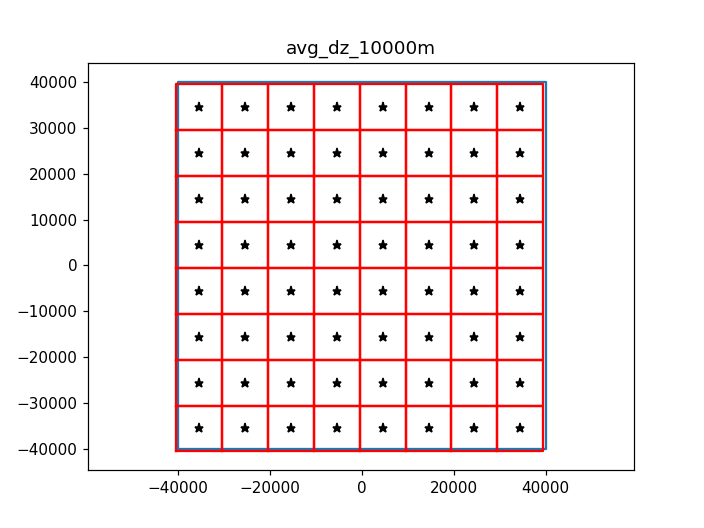

10000.0


<IPython.core.display.Javascript object>


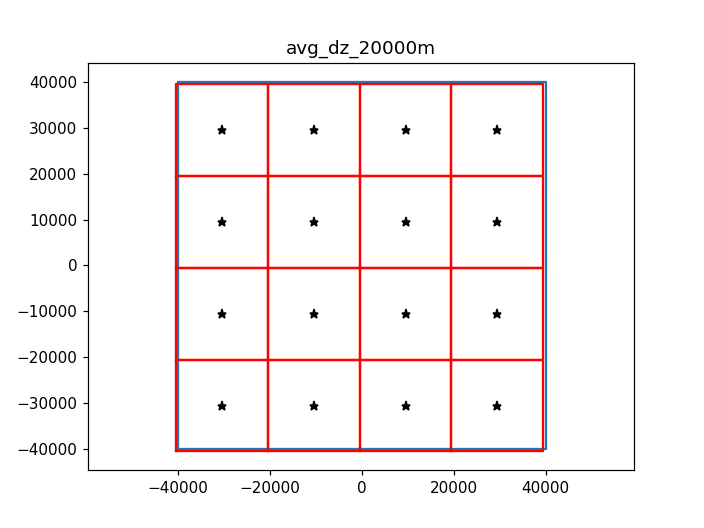

20000.0


<IPython.core.display.Javascript object>


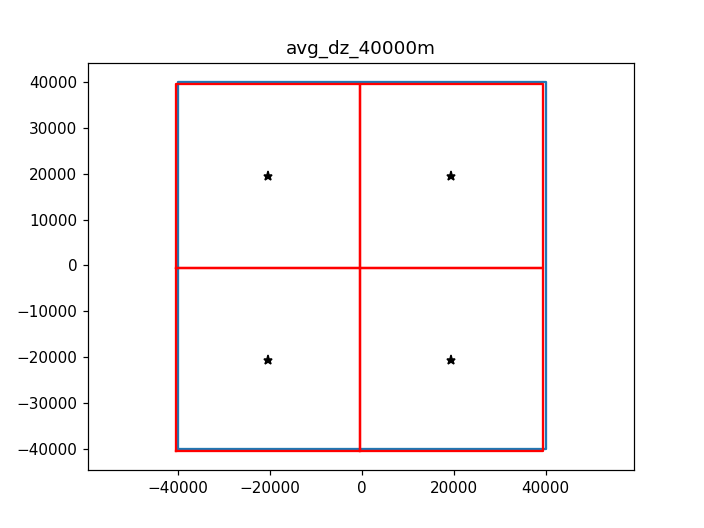

40000.0


<IPython.core.display.Javascript object>


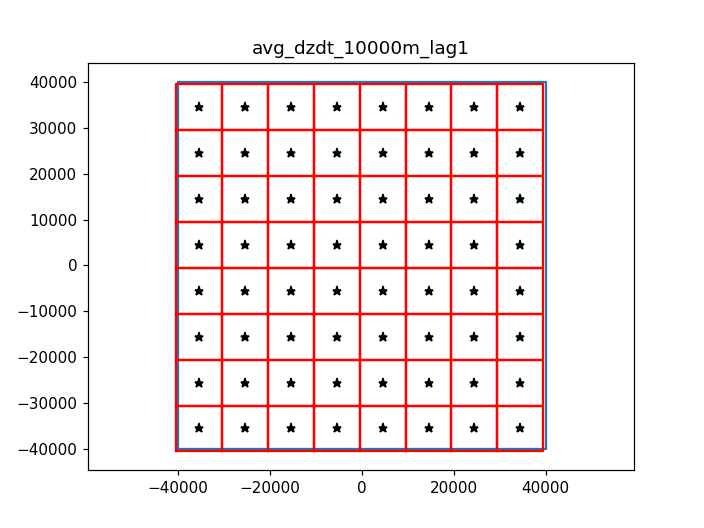

10000.0


<IPython.core.display.Javascript object>


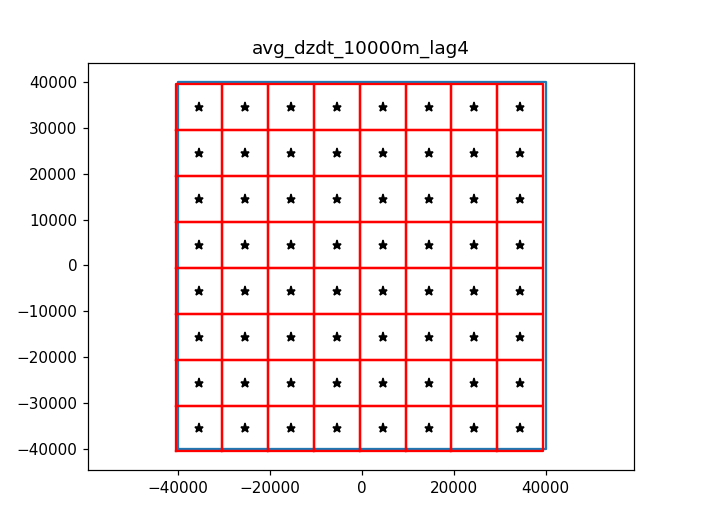

10000.0


<IPython.core.display.Javascript object>


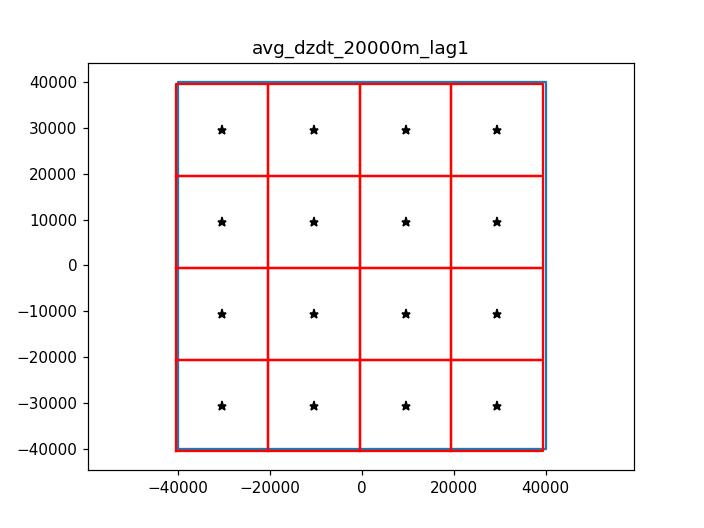

20000.0


<IPython.core.display.Javascript object>


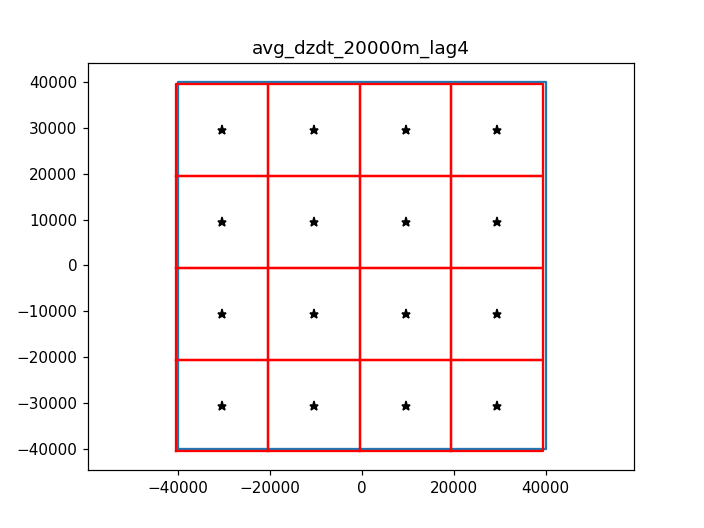

20000.0


<IPython.core.display.Javascript object>


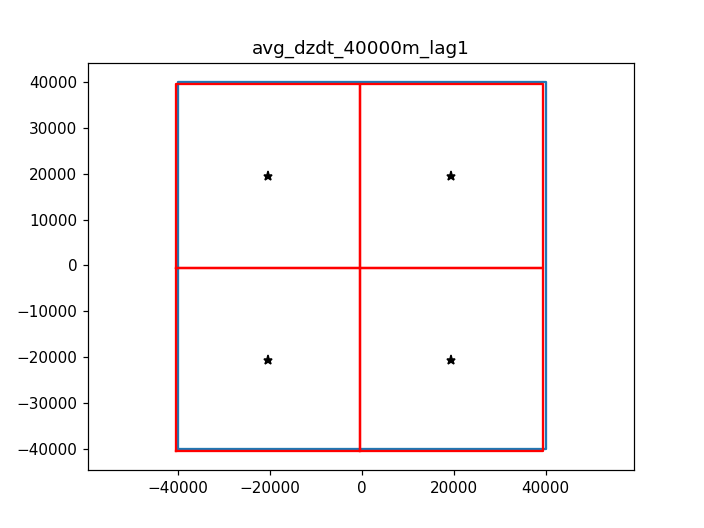

40000.0


<IPython.core.display.Javascript object>


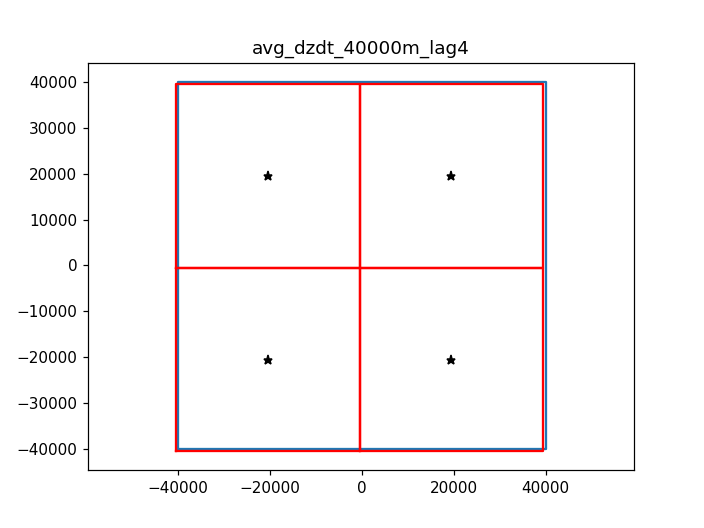

40000.0


<IPython.core.display.Javascript object>


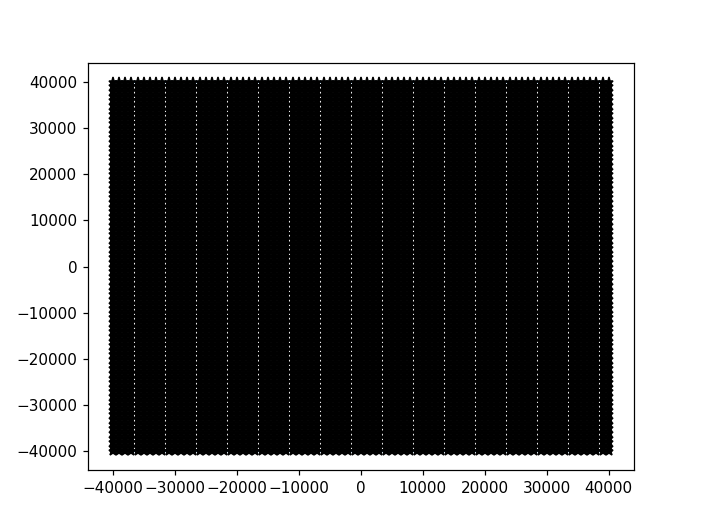

<IPython.core.display.Javascript object>


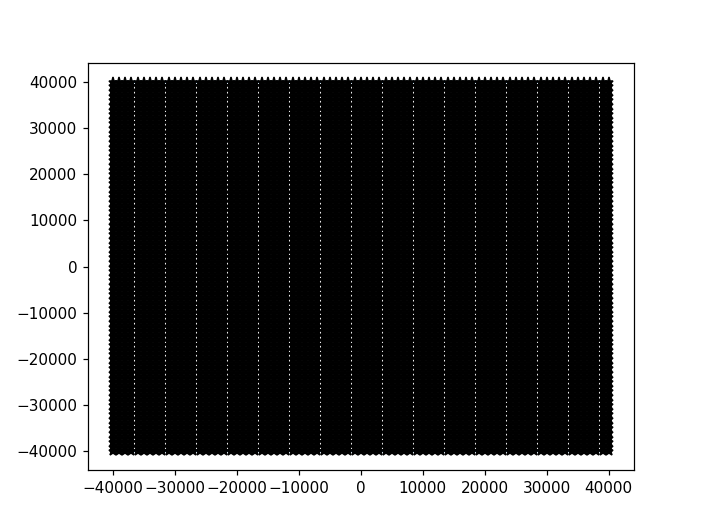

<IPython.core.display.Javascript object>


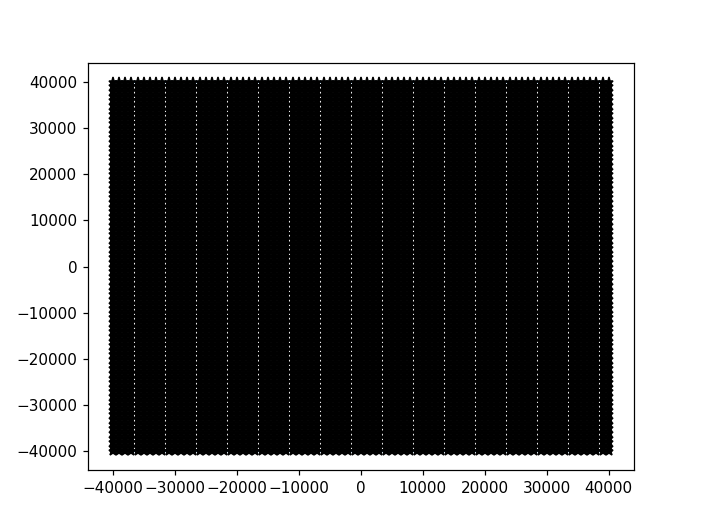

<IPython.core.display.Javascript object>


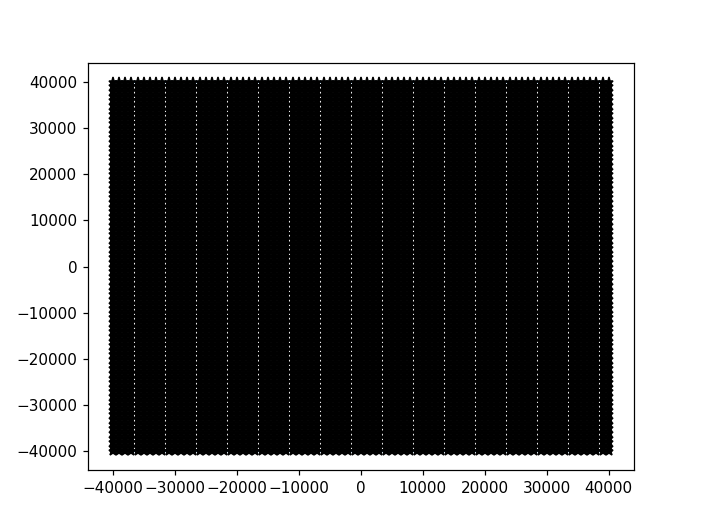

In [26]:
xy0=np.array([-328., -1700.])*1000.
scale_re=re.compile('_(\d+)m')
for name, ds in DS.items():
    plt.figure();
    plt.plot(xy0[0]+np.array([-1, -1, 1, 1, -1])*4e4-xy0[0], xy0[1]+np.array([-1, 1, 1, -1, -1])*4e4-xy0[1])
    xg, yg=np.meshgrid(ds.x, ds.y)
    try:
        L=float(scale_re.search(name).group(1))
        print(L)
    except Exception:
        L=xg[0,1]-xg[0,0]
    plt.plot(xg-xy0[0], yg-xy0[1],'k*')
    if L < 5000:
        continue
    for xy in zip(xg.ravel(), yg.ravel()):
        plt.plot(xy[0]+np.array([-1, -1, 1, 1, -1])*L/2-xy0[0], xy[1]+np.array([-1, 1, 1, -1, -1])*L/2-xy0[1],'r')
    plt.axis('equal')
    plt.title(name)
    

In [8]:
1000*30

30000

In [9]:
DS.keys()


dict_keys(['avg_dz_10000m', 'avg_dz_20000m', 'avg_dz_40000m', 'avg_dzdt_10000m_lag1', 'avg_dzdt_10000m_lag4', 'avg_dzdt_20000m_lag1', 'avg_dzdt_20000m_lag4', 'avg_dzdt_40000m_lag1', 'avg_dzdt_40000m_lag4', 'dz', 'dzdt_lag1', 'dzdt_lag4', 'z0'])

In [12]:
DS['z0'].x[-1]-xy0[0]

40000.0